<h1><center> PPOL564 - Data Science I: Foundations </center><h1>
<h3><center> Lecture 16 <br><br><font color='grey'> Eigen Decompositions </font></center></h3>

# Concepts Covered:

- Intuition of what eigenvalues and eigenvectors are
- Deriving eigenvalues and eigenvectors
- Eigendecompositions
- Properties of the Eigens

In [1]:
import numpy as np
from numpy import linalg as la
import pandas as pd
import matplotlib.pyplot as plt
import requests

# Read in Visualization code from Github (requires bokeh module)
exec(requests.get('https://raw.githubusercontent.com/edunford/ppol564/master/lectures/visualization_library/visualize.py').content)
vla = LinearAlgebra # assign class to an simplier naming convention.

Loading BokehJS ...

# What are Eigen Vectors and Values?

Say we have some transformation matrix $\textbf{A}$.

In [2]:
A = np.array([[1,2],
              [2,1]])
A

array([[1, 2],
       [2, 1]])

Let's transform some vector $\vec{x}$ by $\textbf{A}$.

In [3]:
x = np.array([-.3,.1])

print('Original vector x')
print(x)

# What happens to as we transform x by matrix A?
print("\nAx")
print(A.dot(x))
print("\nAAx")
print(A.dot(A.dot(x)))
print("\nAAAx")
print(A.dot(A.dot(A.dot(x))))

Original vector x
[-0.3  0.1]

Ax
[-0.1 -0.5]

AAx
[-1.1 -0.7]

AAAx
[-2.5 -2.9]


Let's do the same thing again with vector $\vec{v}$

In [4]:
v = np.array([.7,.7])

print('Original vector v')
print(v)


# What happens to as we transform v by matrix A?
print("\nAv")
print(A.dot(v))
print("\nAAv")
print(A.dot(A.dot(v)))
print("\nAAAv")
print(A.dot(A.dot(A.dot(v))))

Original vector v
[0.7 0.7]

Av
[2.1 2.1]

AAv
[6.3 6.3]

AAAv
[18.9 18.9]


Let's visualize this...

In [5]:
plot = vla()
plot.graph(extent=5)
plot.vector(x,add_color="black")
plot.vector(v,add_color="blue")
plot.show()

In [6]:
# Plot vector x and all its transformations
plot.vector(A.dot(x),add_color="black",alpha=.2)
plot.vector(A.dot(A.dot(x)),add_color="black",alpha=.2)
plot.vector(A.dot(A.dot(A.dot(x))),add_color="black",alpha=.2)

# Plot vector v and all its transformations
plot.vector(A.dot(v),add_color="blue",alpha=.2)
plot.vector(A.dot(A.dot(v)),add_color="blue",alpha=.2)
plot.vector(A.dot(A.dot(A.dot(v))),add_color="blue",alpha=.2)
plot.show()

**_What is going on here?_**

$\vec{v}$ isn't being transformed like $\vec{x}$ is each time; rather, it's being scaled!

In [7]:
print(v)
print(v*3)
print(v*(3**2))
print(v*(3**3))

[0.7 0.7]
[2.1 2.1]
[6.3 6.3]
[18.9 18.9]


Why? 

$\vec{v}$ is an **Eigenvector**! 



An Eigen vector is a vector that only expands or shrinks when undergoing a linear transformation. An eigenvector (or the **_characteristic vector of a linear transformation_**) is a _non-zero vector_ that changes by only a scalar factor when that linear transformation is applied to it. 

The factor by which that Eigenvector shrinks or expands is called its **Eigenvalue**, which we denote with $\lambda$.

# Finding Eigenvalues and Eigenvectors 


The equation for locating an Eigenvalue and Eigenvector is as follows.

<br>
<br>

\begin{equation}
\textbf{A}\vec{v} = \lambda \vec{v}
\end{equation}

<br>
<br>

We want to locate some $\vec{v}$ where the transformation of that vector simply yields a scaled version of that original vector. 

Think about this: **our transformation matrix $\textbf{A}$ collapses to a _single scalar value_ when applied on $\vec{v}$**

#### We are interested in finding two things:

1. what is this $\vec{v}$ (the eigenvector)
2. what is that scalar $\lambda$ (the eigenvalue) that $\vec{v}$ is being scaled by?

First, let's do a little re-arranging 


We're going from matrix multiplication to scalar multiplication, which is odd. To get around this, we can turn a scalar into a matrix by taking the scalar product of the identity matrix. 

$$ \lambda \textbf{I}$$

$$ \lambda \begin{bmatrix}1 & 0 \\ 0 & 1 \end{bmatrix}$$

$$ \begin{bmatrix}\lambda  & 0 \\ 0 & \lambda  \end{bmatrix}$$

Also, $\vec{v}$ is on both sides of the equation, so let's re-arrange things.

<br>
<br>

$$ \textbf{A}\vec{v} = \lambda \textbf{I} \vec{v} $$

<br>
<br>

$$ \textbf{A}\vec{v} - \lambda \textbf{I} \vec{v}  = 0$$

<br>
<br>

$$ (\textbf{A} - \lambda \textbf{I})\vec{v}  = 0$$

<br>
<br>

Assuming that $\textbf{A}$ is a $2 \times 2$ matrix

<br>
<br>

$$ ( \begin{bmatrix} a_{11}  & a_{12} \\ a_{21} & a_{22} \end{bmatrix} -  \begin{bmatrix}\lambda  & 0 \\ 0 & \lambda  \end{bmatrix})\vec{v}  = 0$$

<br>
<br>

$$ \begin{bmatrix} a_{11} - \lambda & a_{12} \\ a_{21} & a_{22} - \lambda \end{bmatrix}\vec{v}  = 0$$

## Finding the eigenvalues

Recall that what we are aiming for is locating an instance when $ \begin{bmatrix} a_{11} - \lambda & a_{12} \\ a_{21} & a_{22} - \lambda \end{bmatrix}$ **collapses down into a _singular value_.**

Put differently, we are looking for values of $\lambda$ that result in the determinant of our **A** matrix equaling zero.

<br>
<br>

$$ det(\textbf{A} - \lambda \textbf{I})  = 0$$

<br>
<br>

$$det(\begin{bmatrix} a_{11} - \lambda & a_{12} \\ a_{21} & a_{22} - \lambda \end{bmatrix}) = 0$$

<br>
<br>

So, we merely need to plug in values for $\lambda$ where this condition holds.

Let's try doing this computationally by just brute force plugging in values and having the computer do the work for us. 

In [8]:
def find_lambdas(A,start,end):
    '''
    Calculates the determinant across a specified range of lamba entries.
    '''
    store = []
    for lamb in np.arange(start,end+1,.5):
        det = la.det(A - (lamb*np.eye(2)))
        store.append([lamb,det])
    return np.array(store)

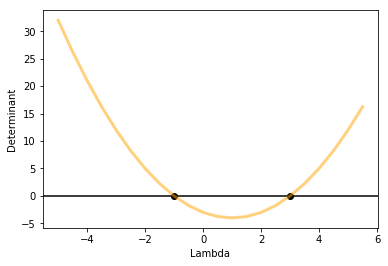

In [9]:
# Scan between -5 and 5
vals = find_lambdas(A,-5,5)

# Let's plot this 
plt.figure()
plt.ylabel('Determinant')
plt.xlabel('Lambda')
plt.axhline(0,color="black")
plt.plot(vals[:,0],vals[:,1],
         linewidth=3,color="orange",alpha=.5)

# Plot instances when det == 0
plt.scatter(vals[np.where(vals[:,1]==0),0],
           vals[np.where(vals[:,1]==0),1],
           color="black") 
plt.show()

In [10]:
# What are these values where the det == 0??
vals[np.where(vals[:,1]==0),0]

array([[-1.,  3.]])

Naturally, we could also derive these values algebraically.

Recall the composition of matrix **A**.

<br>
<br>

\begin{equation}
A =  \begin{bmatrix} 1 & 2 \\ 2 & 1 \end{bmatrix}
\end{equation}

<br>
<br>

\begin{equation}
det(\begin{bmatrix} 1 - \lambda & 2 \\ 2 & 1 - \lambda \end{bmatrix}) = 0
\end{equation}

<br>
<br>

\begin{equation}
(1 - \lambda)(1 - \lambda) - (2)(2)= 0
\end{equation}

<br>
<br>

\begin{equation}
\lambda^2 - 2\lambda - 3 = 0
\end{equation}

<br>
<br>

The above equation is known as the "characteristic polynomial".

<br>
<br>

\begin{equation}
(\lambda + 1)(\lambda - 3) = 0
\end{equation}

<br>
<br>

\begin{equation}
\lambda = - 1 \\ \lambda = 3
\end{equation}


## Finding the eigenvectors

Let's now find the eigenvector that corresponds with each eigenvalue. We can do this easily by 

1. plugging in our respective eigenvalues, and 

2. Solving for the values of $\vec{v}$ in equation 1

<br>
<br>

\begin{equation}
\begin{bmatrix} 1 - \lambda & 2 \\ 2 & 1 - \lambda \end{bmatrix} \begin{bmatrix}v_1\\v_2\end{bmatrix} = \begin{bmatrix}0\\0\end{bmatrix}
\end{equation}


<br>
<br>

**Solving for the eigenvector when $\lambda = 3$**, using reduced row echelon form to solve the system of equations. The aim is to use row-wise manipulations to convert the matrix to an identity matrix (see lecture 14). Since the our matrix isn't full rank (by definition of what the eigen values are doing), we'll only be able to recover one of the unit vectors. In other words, our aim is to convert first vector column into the $hat{i}$ unit vector.

<br>
<br>

\begin{equation}
\left|
\begin{array}{cc|c}
1 - (3) & 2 & 0  \\ 
2 & 1 -(3) & 0 \\ 
\end{array}
\right|
\end{equation}

<br>
<br>

\begin{equation}
\left|
\begin{array}{cc|c}
-2 & 2 & 0  \\ 
2 & -2 & 0 \\ 
\end{array}
\right|
\end{equation}

<br>
<br>

Add the first row to the second.

<br>
<br>

\begin{equation}
\left|
\begin{array}{cc|c}
-2 & 2 & 0  \\ 
0 & 0 & 0 \\ 
\end{array}
\right|
\end{equation}

<br>
<br>

Then divide the first row by -2.

<br>
<br>

\begin{equation}
\left|
\begin{array}{cc|c}
1 & -1 & 0  \\ 
0 & 0 & 0 \\ 
\end{array}
\right|
\end{equation}

<br>
<br>

Let's re-represent this as the original matrix format

<br>
<br>

\begin{equation}
\begin{bmatrix} 1 & -1 \\ 0 & 0 \end{bmatrix}\begin{bmatrix} v_1 \\ v_2 \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \end{bmatrix}
\end{equation}

<br>
<br>

Multiple $\vec{v}$ by the reduced form equation.

<br>
<br>

\begin{equation}
v_1(1) - v_2(1) = 0 
\end{equation}

<br>
<br>


\begin{equation}
v_1 = v_2 \\
v_1 = 1 \\
v_2 = 1
\end{equation}

<br>
<br>

Thus, the eigenvector $\vec{e}_{\lambda = 3}$ is all vectors that span  the vector $\begin{bmatrix} 1 \\1  \end{bmatrix}$

<br>
<br>

Now, **Solving for the eigenvector when $\lambda = -1$**


<br>
<br>

\begin{equation}
\left|
\begin{array}{cc|c}
1 - (-1) & 2 & 0  \\ 
2 & 1 -(-1) & 0 \\ 
\end{array}
\right|
\end{equation}

<br>
<br>

\begin{equation}
\left|
\begin{array}{cc|c}
2 & 2 & 0  \\ 
2 & 2 & 0 \\ 
\end{array}
\right|
\end{equation}

<br>
<br>

Let's subtract the first row from the second and divide the first row by 2. 

<br>
<br>

\begin{equation}
\left|
\begin{array}{cc|c}
1 & 1 & 0  \\ 
0 & 0 & 0 \\ 
\end{array}
\right|
\end{equation}

<br>
<br>

\begin{equation}
\left|
\begin{array}{cc|c}
1 & 1 & 0  \\ 
0 & 0 & 0 \\ 
\end{array}
\right|
\end{equation}


<br>
<br>

\begin{equation}
\begin{bmatrix} 1 & 1 \\ 0 & 0 \end{bmatrix}\begin{bmatrix} v_1 \\ v_2 \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \end{bmatrix}
\end{equation}

<br>
<br>

\begin{equation}
v_1 + v_2 = 0 \\
v_1 = -v_2 \\
v_1 = -1 \\
v_2 = 1
\end{equation}

<br>
<br>

Thus, the eigenvector $\vec{e}_{\lambda = -1}$ is all vectors that span  the vector $\begin{bmatrix} -1 \\1  \end{bmatrix}$

Let's visualize these two vectors to see how we did.

In [11]:
e1 = np.array([1,1])
e2 = np.array([1,-1])

# Generate Graphic
plot.clear().graph(20)
plot.vector(A.dot(e1),add_color="blue",alpha=.2)
plot.vector(A.dot(A.dot(e1)),add_color="blue",alpha=.2)
plot.vector(A.dot(A.dot(A.dot(e1))),add_color="blue",alpha=.2)
plot.vector(A.dot(e2),add_color="red",alpha=.2)
plot.vector(A.dot(A.dot(e2)),add_color="red",alpha=.2)
plot.vector(A.dot(A.dot(A.dot(e2))),add_color="red",alpha=.2)
plot.show()

**What sorts of conclusions can we draw from these two eigenvectors and their corresponding eigenvalues?**

<br>
<br>

With each transformation, eigenvector that corresponds with the eigen value 3 grows, whereas the eigenvector that corresponds with the eigen value -1 is stable (it just flips signs but never really changes.
<br>
<br>

This information is really useful when studying a system of linear equations to know if some process is shrinking, growing, or at equilibrium (see the reading for examples!)

### Deriving the Eigenvalues and Vectors using `numpy`

In [12]:
evals, evecs = la.eig(A)

In [13]:
evals

array([ 3., -1.])

In [14]:
evecs

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

Why do these eigenvectors differ slightly from the ones we located manually?

In [27]:
e1 = np.array([1,1])
e2 = np.array([-1,1])

print("\nOur Eigenvectors normalized\n")

print('E1 =',e1/la.norm(e1))
print('E2 =',e2/la.norm(e2))


Our Eigenvectors normalized

E1 = [0.70710678 0.70710678]
E2 = [-0.70710678  0.70710678]


# Eigen Decomposition

Building off the above where we derived each eigenvalue and eigenvector individually, we can express some matrix $\textbf{A}$ as three matrices. This process of breaking down a matrix into the product of other matrices is known as factorization or a **decomposition**. 

Matrix decompositions come in [many flavors](https://en.wikipedia.org/wiki/Matrix_decomposition) in linear algebra and you might run into different ones to help resolve different types of problems. 

If $\textbf{A}$ is an $n \times n$ matrix (with $n$ linearly independent eigenvectors), then we can express the decomposition as follows.

<br>
<br>

\begin{equation}
\textbf{A}\textbf{V} = \textbf{V}\Lambda
\end{equation}

<br>
<br>

\begin{equation}
\textbf{A} = \textbf{V}\Lambda\textbf{V}^{-1}
\end{equation}

<br>
<br>

where 

- $\textbf{V}$ is a matrix of eigenvectors 
- $\Lambda$ is a diagonal matrix of eigenvalues.

In [28]:
L = np.diag(evals)
V = evecs
V_inv = la.inv(V)

print('Original Matrix A\n')
print(A)

print('\nDecomposed Parts\n')

print('Eigenvectors V\n')
print(V.round(2))

print('\nEigenvalues L\n')
print(L.round(2))

print('\nEigenvectors Inverse V^-1\n')
print(V_inv.round(2))

print('\nRecomposed Matrix VLV^-1\n')
print(V.dot(L).dot(V_inv))

Original Matrix A

[[1 2]
 [2 1]]

Decomposed Parts

Eigenvectors V

[[ 0.71 -0.71]
 [ 0.71  0.71]]

Eigenvalues L

[[ 3.  0.]
 [ 0. -1.]]

Eigenvectors Inverse V^-1

[[ 0.71  0.71]
 [-0.71  0.71]]

Recomposed Matrix VLV^-1

[[1. 2.]
 [2. 1.]]


# Properties of the Eigens

#### Multiplicity

Eigen decompositions have some very interesting properties, one of the most interesting features is that if we want to apply a transformation multiple times, we merely need to take a polynomial of our eigenvalues! In way, we already saw this in the initial example above.

<br>
<br>

\begin{equation}
\textbf{A} = \textbf{V}\Lambda\textbf{V}^{-1}
\end{equation}

<br>
<br>

\begin{equation}
\textbf{A}\textbf{A} = \textbf{A}^2 = \textbf{V}\Lambda(\textbf{V}^{-1} \textbf{V})\Lambda\textbf{V}^{-1} = \textbf{V}\Lambda^2\textbf{V}^{-1} 
\end{equation}

<br>
<br>

\begin{equation}
\textbf{A}^n = \textbf{V}\Lambda^n\textbf{V}^{-1} 
\end{equation}

<br>
<br>

This can greatly ease some computations, such as [Markov chains](http://setosa.io/ev/markov-chains/)!

In [29]:
A.dot(A.dot(A.dot(A)))

array([[41, 40],
       [40, 41]])

In [30]:
V.dot(L**4).dot(V_inv)

array([[41., 40.],
       [40., 41.]])

So we needed to transform $\vec{x}$ by $\textbf{A}$ 25 times we could just do this.

In [31]:
A_25 = V.dot(L**25).dot(V_inv)
A_25.dot(x)

array([-8.47288609e+10, -8.47288609e+10])

#### The product of the eigenvalues is equal to the determinant of $\textbf{A}$

In [32]:
la.det(A)

-2.9999999999999996

In [33]:
evals.prod()

-2.999999999999999

#### The sum of the eigenvalues is equal to the trace of $\textbf{A}$ (i.e. the sum of the values along the diagonal of $\textbf{A}$) 

In [34]:
A.trace()

2

In [35]:
sum(evals)

2.000000000000001

#### If $\textbf{A}$  is invertible, then the eigenvalues of the inverse of $\textbf{A}$  are inverted

In [36]:
evals

array([ 3., -1.])

In [37]:
la.eigvals(la.inv(A))

array([ 0.33333333, -1.        ])

#### Eigenvectors are orthogonal to one another

This means each eigenvector describes a unique dimension!

In [38]:
evecs[:,0].dot(evecs[:,1])

0.0